**Changed the optimiser and the loss function**

In [0]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras import optimizers
import matplotlib.pyplot as plt
import numpy as np

In [0]:
batch_size = 200
num_classes = 10
epochs = 80

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


In [0]:
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd,metrics=['accuracy'])

In [0]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/80
50000/50000 [==============================] - 14s 277us/step - loss: 0.0886 - acc: 0.1689 - val_loss: 0.0852 - val_acc: 0.2566
Epoch 2/80
50000/50000 [==============================] - 14s 276us/step - loss: 0.0851 - acc: 0.2414 - val_loss: 0.0828 - val_acc: 0.2921
Epoch 3/80
50000/50000 [==============================] - 14s 275us/step - loss: 0.0831 - acc: 0.2760 - val_loss: 0.0811 - val_acc: 0.3215
Epoch 4/80
50000/50000 [==============================] - 14s 274us/step - loss: 0.0819 - acc: 0.2969 - val_loss: 0.0799 - val_acc: 0.3346
Epoch 5/80
50000/50000 [==============================] - 14s 277us/step - loss: 0.0808 - acc: 0.3151 - val_loss: 0.0790 - val_acc: 0.3501
Epoch 6/80
50000/50000 [==============================] - 14s 276us/step - loss: 0.0799 - acc: 0.3287 - val_loss: 0.0781 - val_acc: 0.3599
Epoch 7/80
50000/50000 [==============================] - 14s 275us/step - loss: 0.0791 - acc: 0.3386 - val_loss: 0.

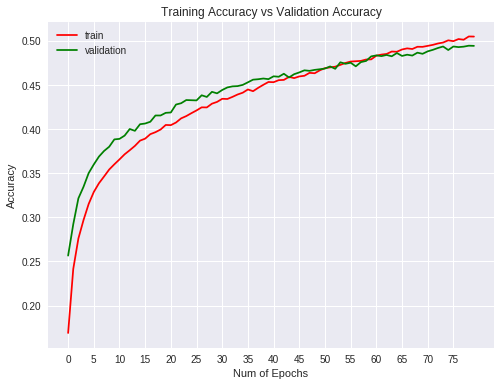

In [0]:
plt.figure(0)
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'g')
plt.xticks(np.arange(0, 80, 5.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
plt.show()

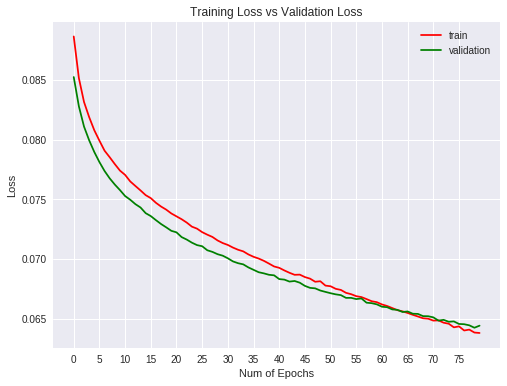

In [0]:
plt.figure(1)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'g')
plt.xticks(np.arange(0, 80, 5.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
plt.show()

**Conclusion:**
Steep reduction in loss after using SGD and increasing Epoch to 80. Also only 14 sec per Epoch. Accuracy marginally near 50%.